In [ ]:
import importlib.util as imp
import numpy as np
import pandas as pd

##2) Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATAPATH=r"/content/drive/My Drive/IBM_Project/Dataset"

In [ ]:
churn = pd.read_csv(f"{DATAPATH}/Churn_Modelling.csv")

In [ ]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#dropping row number columns as we already have index column by default
churn.drop(['RowNumber'], axis=1,inplace=True)

In [ ]:
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##3) i) Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

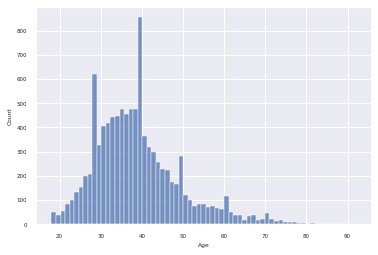

In [ ]:
# plt.scatter(churn.index,churn["Age"])
# plt.show()

# Age Histogram
sns.histplot(x='Age', data=churn)

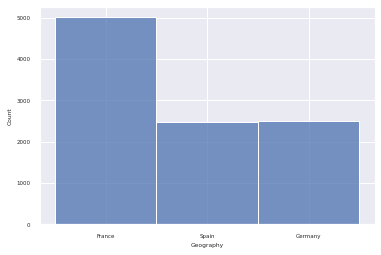

In [ ]:
# Geography Histogram
sns.histplot(x='Geography', data=churn)

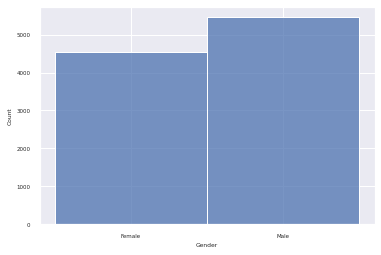

In [ ]:
# Geography Histogram
sns.histplot(x='Gender', data=churn)

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


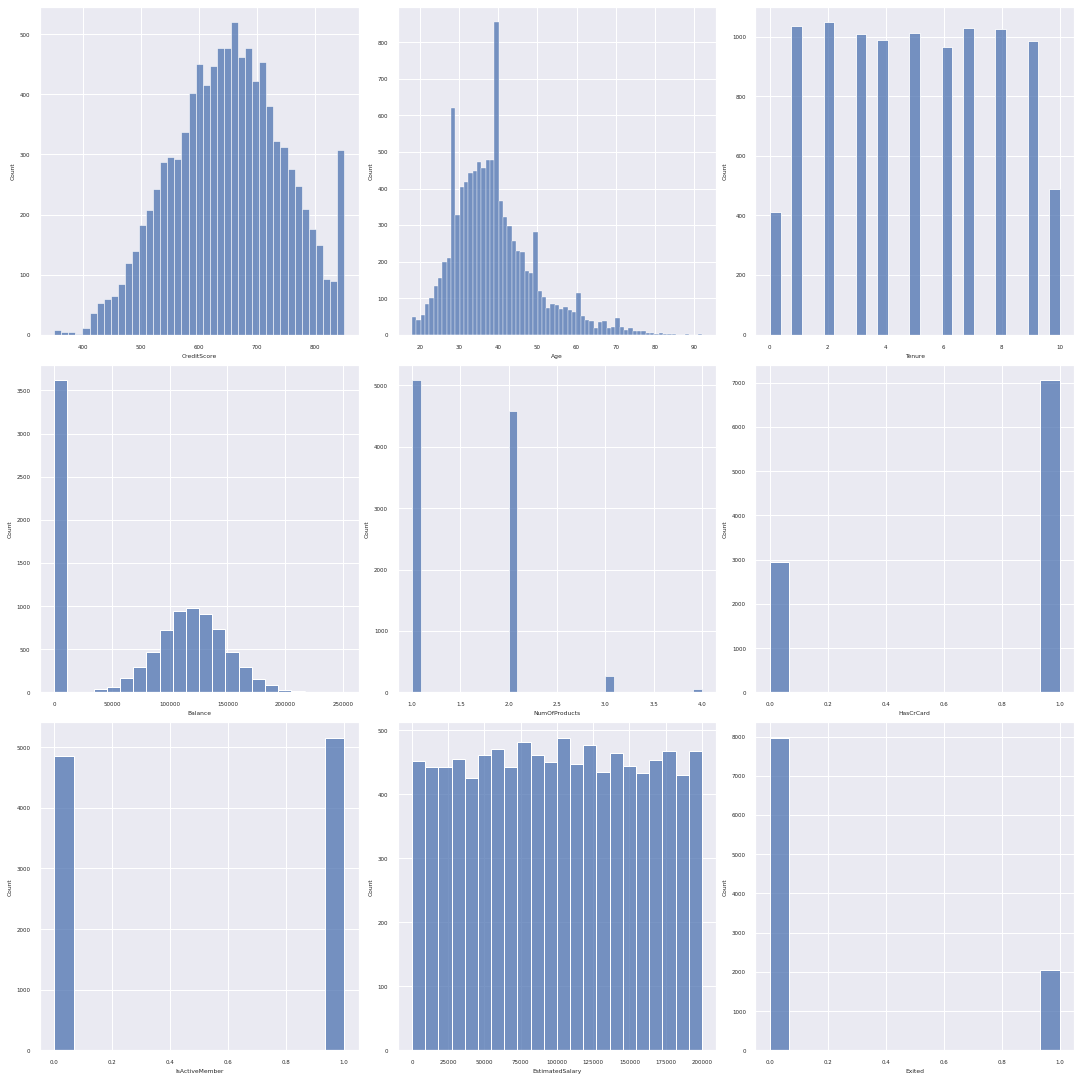

In [ ]:
cols = 3
rows = 3
num_cols = churn.select_dtypes(exclude='object').columns #exclude string based columns namely Surname, Geography, Gender
print(num_cols)
fig = plt.figure(figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols[1:]): #exclude Customer ID
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = churn[col], ax = ax)
    
fig.tight_layout()  
plt.show()

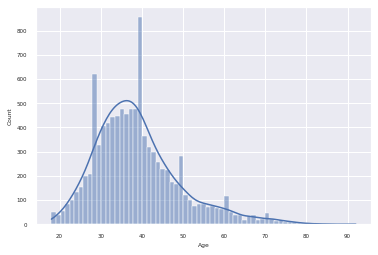

In [ ]:
# sns.kdeplot(x='Age', data=churn, hue='Exited')
sns.histplot(x='Age', data=churn, kde=True)

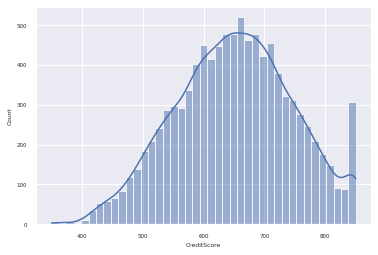

In [ ]:
# sns.kdeplot(x='Age', data=churn, hue='IsActiveMember')
sns.histplot(x='CreditScore', data=churn, kde=True)

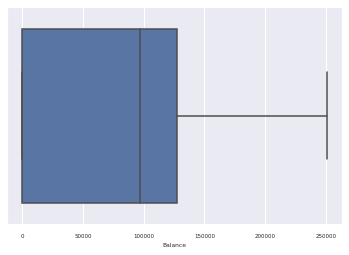

In [ ]:
sns.boxplot(x=churn['Balance'])

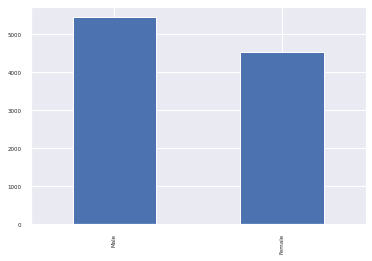

In [ ]:
churn['Gender'].value_counts().plot.bar()

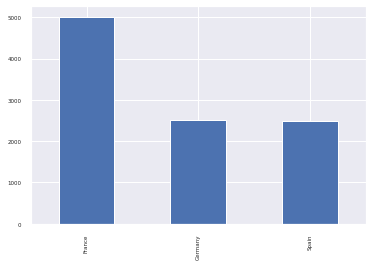

In [ ]:
churn['Geography'].value_counts().plot.bar()

##3) ii) Bi - Variate Analysis

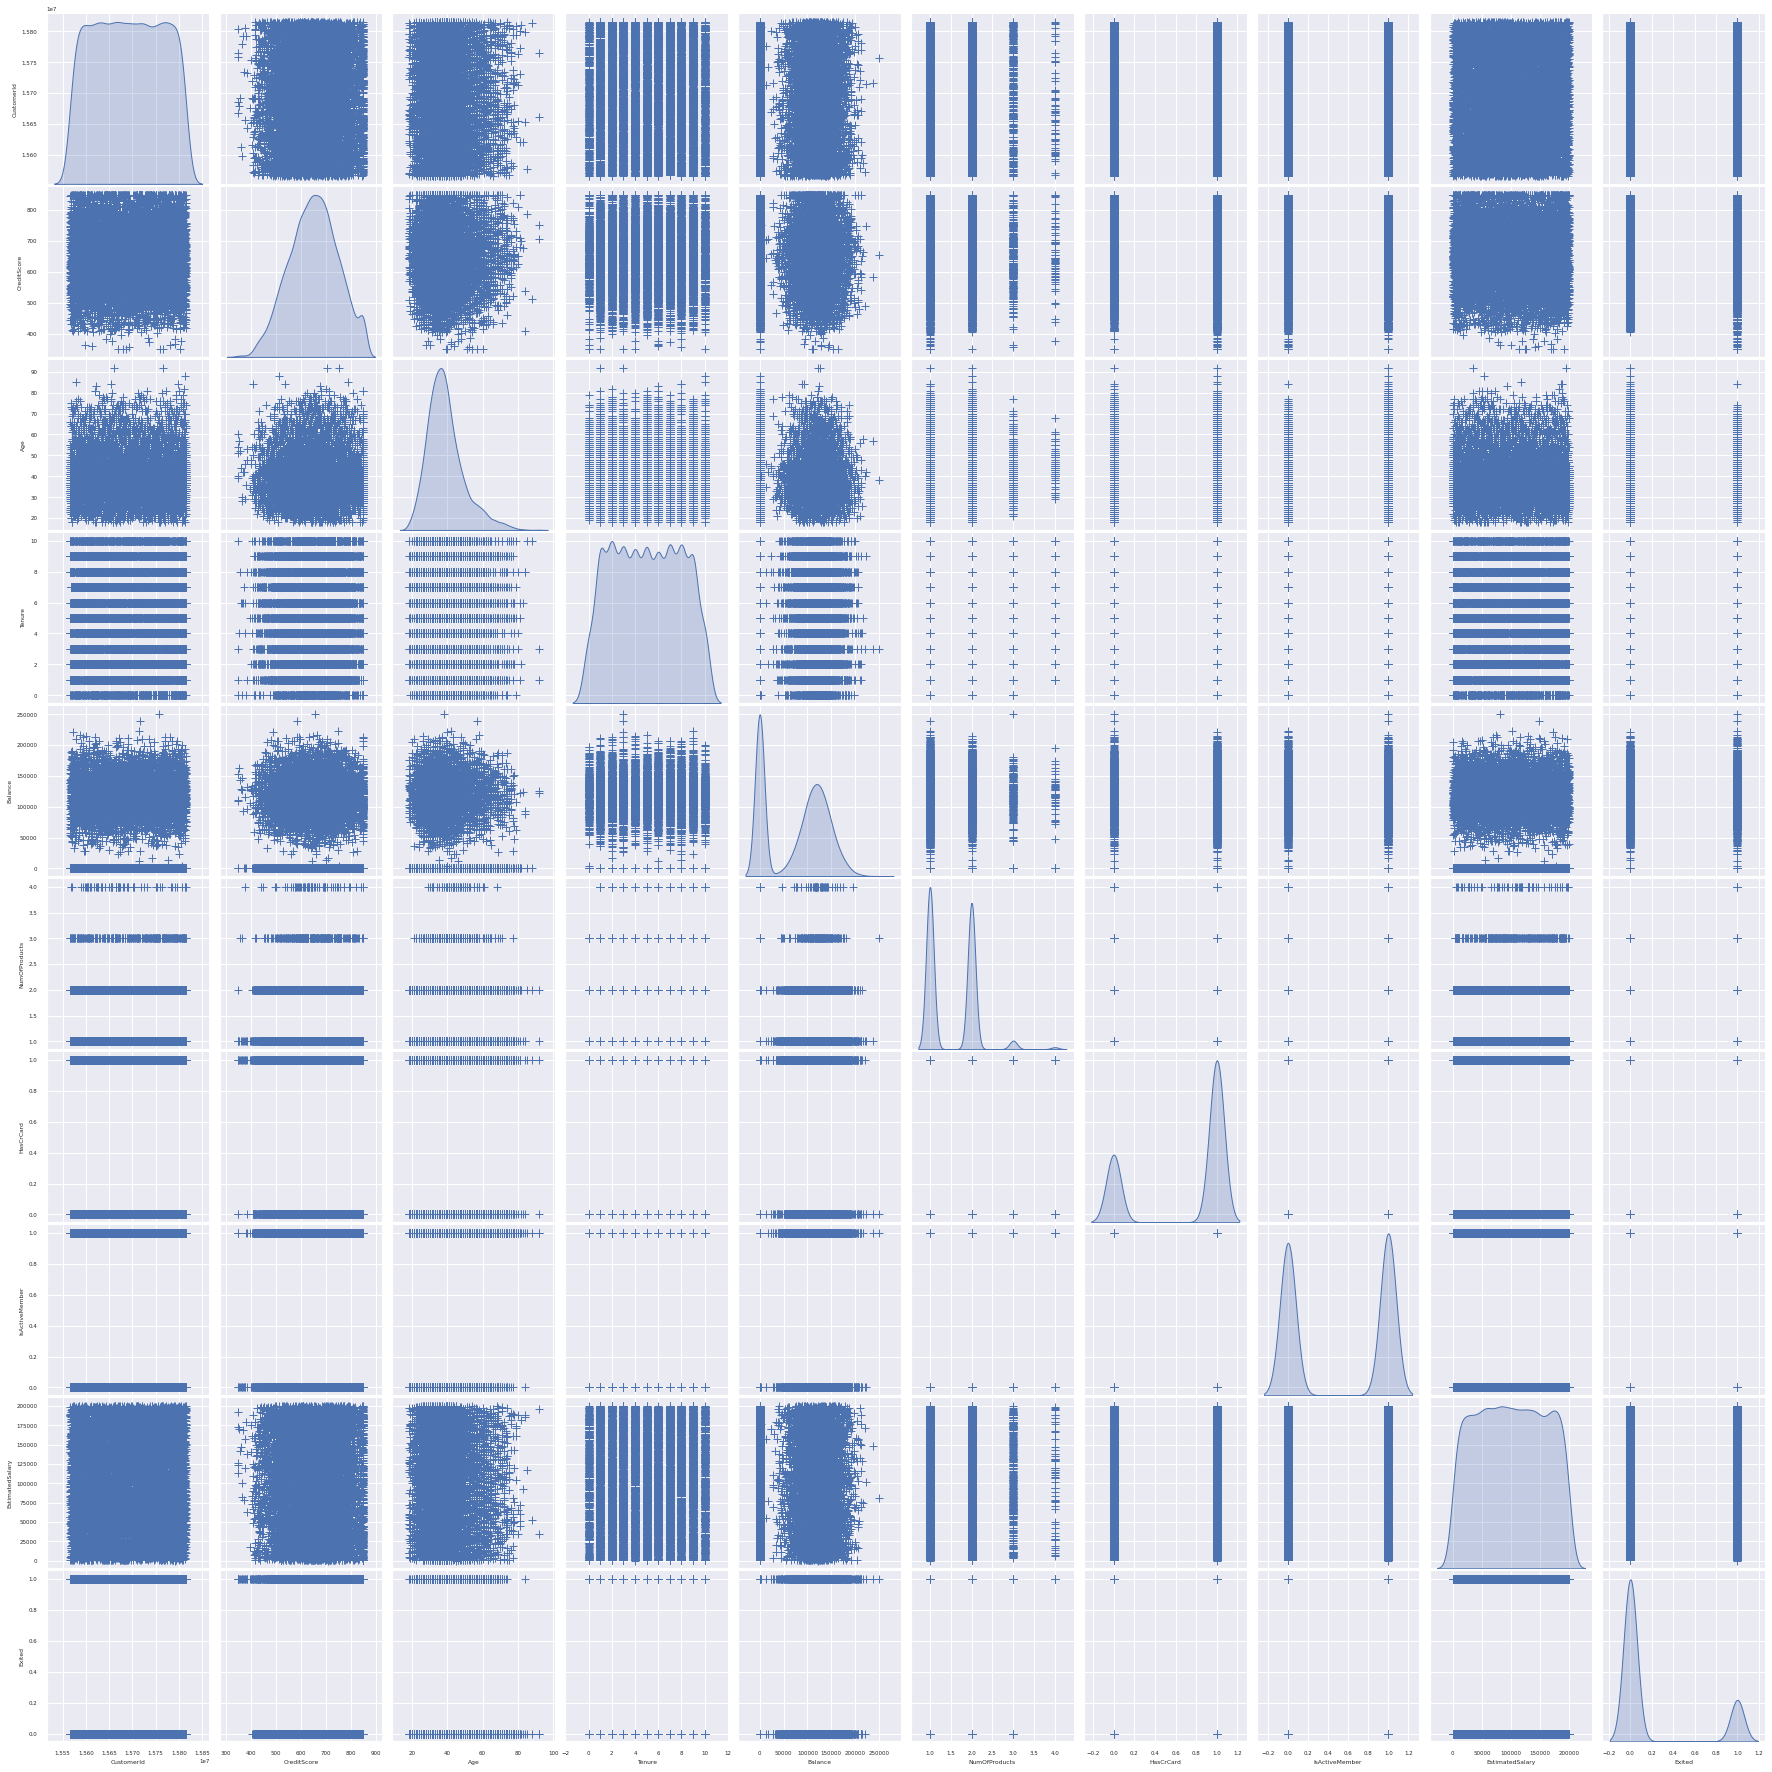

In [ ]:
g = sns.pairplot(churn, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

Text(0, 0.5, 'Balance')

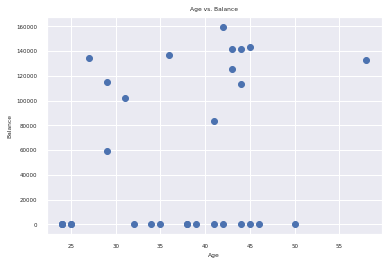

In [ ]:
import matplotlib.pyplot as plt

#create scatterplot of hours vs. score
plt.scatter(churn.Age[:30], churn.Balance[:30])
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')

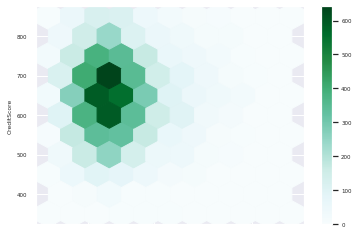

In [ ]:
churn.plot.hexbin(x='Age', y='CreditScore', gridsize=10)

##3) iii) Multi-variate Analysis

In [ ]:
churn.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


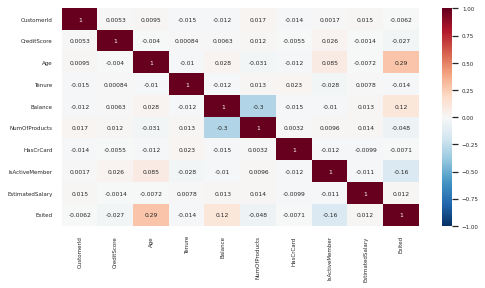

In [ ]:
sns.set(font_scale=0.50)
plt.figure(figsize=(8,4))
sns.heatmap(churn.corr(),cmap='RdBu_r', annot=True, vmin=-1, vmax=1)

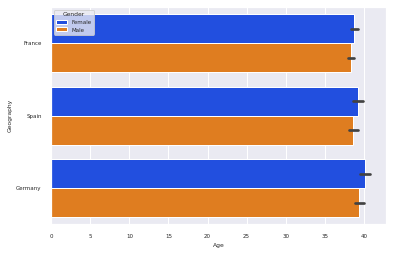

In [ ]:
#Three variables - Multivaraiate
sns.barplot(x='Age', y='Geography', data=churn, palette='bright',hue='Gender')

##4) Descriptive statistics

In [ ]:
import statistics as st

In [ ]:
churn[['Age', 'Balance', 'EstimatedSalary']].mean()

Age                    38.921800
Balance             76485.889288
EstimatedSalary    100090.239881
dtype: float64

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn['Age'].median()

37.0

In [ ]:
standard_deviation = churn['CreditScore'].std()
print(standard_deviation)

96.65329873613035


In [ ]:
st.mode(churn['Geography'])

'France'

In [ ]:
st.median(churn['Age'])

37.0

In [ ]:
st.variance(churn['CreditScore'])

9341.860156575658

##5) Handle Missing Values

In [ ]:
churn.isnull().sum() #no missing values

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##6) Find and replace outliers

### Visualize Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


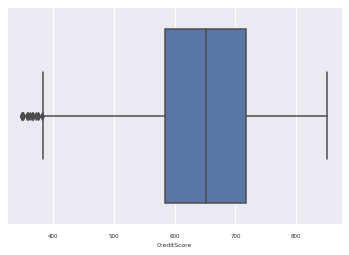

In [ ]:
sns.boxplot(churn['CreditScore'],data=churn)

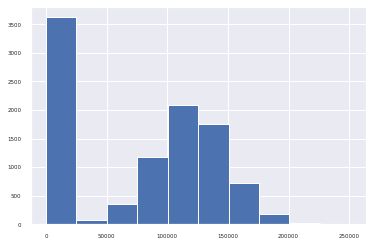

In [ ]:
churn['Balance'].hist()

In [ ]:
for col in num_cols[1:]:
  print('skewness value of ',col,churn[col].skew())

#Skewness should be in the range of -1 to 1, any columns with skewness outside of that range would have outliers 

skewness value of  CreditScore -0.07160660820092675
skewness value of  Age 1.0113202630234552
skewness value of  Tenure 0.01099145797717904
skewness value of  Balance -0.14110871094154384
skewness value of  NumOfProducts 0.7455678882823168
skewness value of  HasCrCard -0.9018115952400578
skewness value of  IsActiveMember -0.06043662833499078
skewness value of  EstimatedSalary 0.0020853576615585162
skewness value of  Exited 1.4716106649378211


In [ ]:
Q1=churn['Age'].quantile(0.25)
Q3=churn['Age'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
IQR

12.0

##Removing Outliers

In [ ]:
#Values above than the upper bound and below than the lower bound are considered outliers

upper = churn['Age'] >= (Q3+1.5*IQR)
 
# print("Upper bound:",upper)
print(np.where(upper))
 
lower = churn['Age'] <= (Q1-1.5*IQR)
# print("Lower bound:", lower)
print(np.where(lower))

(array([  58,   85,  104,  158,  181,  230,  234,  243,  252,  276,  310,
        364,  371,  385,  387,  399,  538,  559,  567,  602,  612,  617,
        658,  678,  696,  736,  766,  769,  807,  811,  823,  859,  884,
        888,  948,  952,  957,  963,  969,  997, 1009, 1039, 1040, 1055,
       1114, 1205, 1234, 1235, 1246, 1252, 1278, 1285, 1328, 1342, 1387,
       1407, 1410, 1433, 1439, 1457, 1519, 1543, 1607, 1614, 1642, 1790,
       1810, 1866, 1901, 1904, 1907, 1933, 1981, 1996, 2002, 2012, 2039,
       2053, 2078, 2094, 2108, 2154, 2159, 2164, 2244, 2274, 2433, 2458,
       2459, 2519, 2553, 2599, 2615, 2659, 2670, 2713, 2717, 2760, 2772,
       2778, 2791, 2855, 2877, 2901, 2908, 2925, 2926, 3008, 3033, 3054,
       3110, 3142, 3166, 3192, 3203, 3229, 3305, 3308, 3311, 3314, 3317,
       3346, 3366, 3368, 3378, 3382, 3384, 3387, 3396, 3403, 3434, 3462,
       3497, 3499, 3527, 3531, 3541, 3559, 3573, 3575, 3593, 3602, 3641,
       3646, 3647, 3651, 3690, 3691, 3702, 3719, 3

In [ ]:
#Removing outliers based off Age column

# IQR
Q1 = np.percentile(churn['Age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(churn['Age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", churn.shape)
 
# Upper bound
upper = np.where(churn['Age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(churn['Age'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
churn.drop(upper[0], inplace = True)
churn.drop(lower[0], inplace = True)
 
print("New Shape: ", churn.shape)

Old Shape:  (10000, 13)
New Shape:  (9589, 13)


In [ ]:
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
for col in num_cols[1:]:
  print('skewness value of ',col,churn[col].skew())

# Now we have reduced the Age column's skewness values within -1 to 1 range
# We left the Exited column's skewness value as it is the dependent varaible

skewness value of  CreditScore -0.07274225895185718
skewness value of  Age 0.44721544739487257
skewness value of  Tenure 0.008085830714996462
skewness value of  Balance -0.1409005824644143
skewness value of  NumOfProducts 0.7470530176747141
skewness value of  HasCrCard -0.9034483996482451
skewness value of  IsActiveMember -0.008552881368996219
skewness value of  EstimatedSalary -0.0025661797132480266
skewness value of  Exited 1.4798502461410206


##7) Check for Categorical columns and perform encoding.


### Label encoding and One Hot encoding

In [ ]:
churn.reset_index(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
categorical_feature_mask = churn.dtypes==object

categorical_cols = churn.columns[categorical_feature_mask].tolist()

In [ ]:
categorical_cols=categorical_cols[1:]

In [ ]:
categorical_cols

['Geography', 'Gender']

In [ ]:
le = LabelEncoder()

In [ ]:
churn[categorical_cols] = churn[categorical_cols].apply(lambda col: le.fit_transform(col))
churn[categorical_cols].head(10)

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0
5,2,1
6,0,1
7,1,0
8,0,1
9,0,1


In [ ]:
categorical_feature_mask

index              False
CustomerId         False
Surname             True
CreditScore        False
Geography           True
Gender              True
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
enc=OneHotEncoder()

In [ ]:
enc_data=pd.DataFrame(enc.fit_transform(churn[['Geography','Gender']]).toarray())

In [ ]:
enc_data

,0,1,2,3,4
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9584,1.0,0.0,0.0,0.0,1.0
9585,1.0,0.0,0.0,0.0,1.0
9586,1.0,0.0,0.0,1.0,0.0
9587,0.0,1.0,0.0,0.0,1.0


In [ ]:
#First three columns of enc_data is for Geography and the next two columns is for Gender, we can replace the already existing categorical columns with these encoded values

#Dropping already existing Geography and Gender columns
churn.drop(['Geography'], axis=1,inplace=True)
churn.drop(['Gender'], axis=1,inplace=True)

churn.insert(2, "Geography_France", enc_data.iloc[:,0], True)
churn.insert(3, "Geography_Germany", enc_data.iloc[:,1], True)
churn.insert(4, "Geography_Spain", enc_data.iloc[:,2], True)
churn.insert(5, "Gender_Female", enc_data.iloc[:,3], True)
churn.insert(6, "Gender_Male", enc_data.iloc[:,4], True)


In [ ]:
churn

,index,CustomerId,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15634602,1.0,0.0,0.0,1.0,0.0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,1,15647311,0.0,0.0,1.0,1.0,0.0,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,2,15619304,1.0,0.0,0.0,1.0,0.0,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,3,15701354,1.0,0.0,0.0,1.0,0.0,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,4,15737888,0.0,0.0,1.0,1.0,0.0,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,9995,15606229,1.0,0.0,0.0,0.0,1.0,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0
9585,9996,15569892,1.0,0.0,0.0,0.0,1.0,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0
9586,9997,15584532,1.0,0.0,0.0,1.0,0.0,Liu,709,36,7,0.00,1,0,1,42085.58,1
9587,9998,15682355,0.0,1.0,0.0,0.0,1.0,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# We drop some irrelevant columns that does not contribute to prediction
churn.drop(columns="CustomerId",axis=1,inplace=True)
churn.drop(columns="Surname",axis=1,inplace=True)
churn.drop(columns="index",axis=1,inplace=True)

In [ ]:
churn

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,1.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,1.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,1.0,0.0,699,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,1.0,0.0,0.0,0.0,1.0,771,39,5,0.00,2,1,0,96270.64,0
9585,1.0,0.0,0.0,0.0,1.0,516,35,10,57369.61,1,1,1,101699.77,0
9586,1.0,0.0,0.0,1.0,0.0,709,36,7,0.00,1,0,1,42085.58,1
9587,0.0,1.0,0.0,0.0,1.0,772,42,3,75075.31,2,1,0,92888.52,1


##8) Split the data into dependent and independent variables

In [ ]:
X= churn.iloc[:,:-1].values #Indepedent variables
y= churn.iloc[:,-1].values #Dependent varaibles

In [ ]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

###9) Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()
X = scale.fit_transform(X) 

In [ ]:
X

array([[ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
         0.99573337,  0.01997639],
       [-1.0028197 , -0.57955796,  1.74527693, ..., -1.54891873,
         0.99573337,  0.21465635],
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
        -1.00428491,  0.23881355],
       ...,
       [ 0.99718823, -0.57955796, -0.57297497, ..., -1.54891873,
         0.99573337, -1.01072631],
       [-1.0028197 ,  1.72545295, -0.57297497, ...,  0.64561166,
        -1.00428491, -0.12716553],
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
        -1.00428491, -1.07846436]])

##10) Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# We use train_test_split function to split the data such that 25% is used for testing while the remaining 75% is used for training
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

In [ ]:
X_train

array([[ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
         0.99573337, -1.74019169],
       [-1.0028197 , -0.57955796,  1.74527693, ..., -1.54891873,
        -1.00428491, -1.39787901],
       [-1.0028197 ,  1.72545295, -0.57297497, ..., -1.54891873,
         0.99573337, -1.48817335],
       ...,
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
        -1.00428491,  0.71481237],
       [ 0.99718823, -0.57955796, -0.57297497, ..., -1.54891873,
        -1.00428491,  0.60834563],
       [-1.0028197 ,  1.72545295, -0.57297497, ...,  0.64561166,
         0.99573337,  0.0525285 ]])

In [ ]:
X_test

array([[-1.0028197 , -0.57955796,  1.74527693, ..., -1.54891873,
        -1.00428491, -0.90389608],
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
         0.99573337, -0.54087223],
       [-1.0028197 , -0.57955796,  1.74527693, ...,  0.64561166,
         0.99573337, -1.02004733],
       ...,
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
         0.99573337, -0.23978536],
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
         0.99573337, -0.17457887],
       [ 0.99718823, -0.57955796, -0.57297497, ...,  0.64561166,
        -1.00428491, -0.0121091 ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 1])